In [14]:

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression:

  def __init__(self,lr=0.01,n_iters=1000):

    self.lr=lr
    self.n_iters = n_iters
    self.weight = None
    self.bias = None



  # def error(self,y_pred):

  #   return (1/self.n_samples)*(np.sum((self.y*np.log(y_pred))+(1-self.y)*np.log(1-y_pred)))

  def fit(self,X,y):
    self.X = X
    self.y = y
    self.n_samples , self.n_features = X.shape
    self.weight = np.zeros(self.n_features)
    self.bias = 0

    for _ in range(self.n_iters):

      pred = X.dot(self.weight)+self.bias
      y_pred  = sigmoid(pred)
      # err = error(y_pred)

      dw = (1/self.n_samples)*np.dot(X.T,(y_pred-y))
      db = (1/self.n_samples)*np.sum(y_pred-y)

      self.weight = self.weight - self.lr*dw
      self.bias = self.bias - self.lr*db


  def predict(self,x):
    pred =  x.dot(self.weight)+self.bias
    y_pred  = sigmoid(pred)

    class_predictions = [0 if y<=0.5 else 1 for y in y_pred]
    return class_predictions




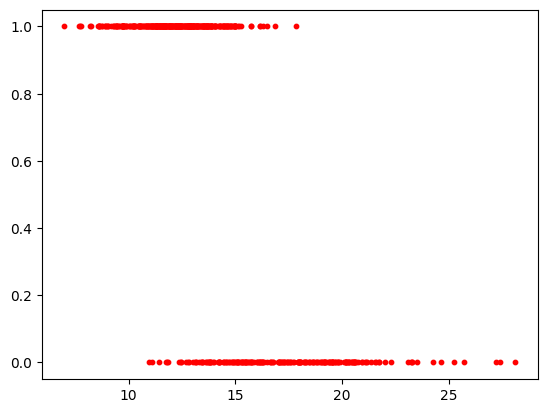

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

datas = load_breast_cancer()
X,y = datas.data, datas.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

plt.scatter(X[:,0],y,color='red',s=10)
plt.show()

In [19]:
lg = LogisticRegression(lr=0.1)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

def accuracy(y_pred,y_test):
  return np.sum(y_pred==y_test)/len(y_test)

print(accuracy(y_pred,y_test))

0.9210526315789473


<ipython-input-14-e2eabe27c9c2>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
